#### 다항회귀
- 직선으로 많은 데이터를 만족할 수 없는 선형회귀의 경우 사용
- 기존 피쳐를 조합해서 항을 늘여주는 작업 진행 ==> 전처리에서 진행

In [39]:
### 모듈 로딩
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [40]:
# 임의의 데이터 생성 ==> 2D
X=np.arange(10).reshape(-1,2) # 행은 자동(-1), 열은 2열
y=np.arange(5)
X.shape,y.shape

((5, 2), (5,))

In [41]:
## 피쳐 2개 => 조합해서 늘리기
poly=PolynomialFeatures(include_bias=False)

# poly.fit(X)
# poly.transform(X)

x1=poly.fit_transform(X)

In [42]:
x1

array([[ 0.,  1.,  0.,  0.,  1.],
       [ 2.,  3.,  4.,  6.,  9.],
       [ 4.,  5., 16., 20., 25.],
       [ 6.,  7., 36., 42., 49.],
       [ 8.,  9., 64., 72., 81.]])

In [43]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [44]:
# 피쳐 2개 ==> 조합해서 늘리기
poly=PolynomialFeatures(include_bias=False,degree=5)
X1=poly.fit_transform(X)

X1.shape

(5, 20)

In [45]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
       'x1^3', 'x0^4', 'x0^3 x1', 'x0^2 x1^2', 'x0 x1^3', 'x1^4', 'x0^5',
       'x0^4 x1', 'x0^3 x1^2', 'x0^2 x1^3', 'x0 x1^4', 'x1^5'],
      dtype=object)

#### 모델에 적용

In [46]:
from sklearn.linear_model import LinearRegression

In [49]:
model=LinearRegression()
model.fit(X1,y)

LinearRegression()

In [50]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('poly',poly),('lrmodel',model)])
pipe.fit(X1,y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias=False)),
                ('lrmodel', LinearRegression())])

In [51]:
pipe.named_steps['lrmodel']

LinearRegression()

In [52]:
pipe.named_steps['lrmodel'].coef_

array([-4.40413932e-15,  2.05098671e-24,  1.13365813e-22, ...,
       -5.23394795e-13,  6.95574807e-14,  1.65183431e-12])

In [53]:
pipe.named_steps['poly'].degree

5

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [55]:
# 임의의 값으로 구성된 x값에 대해 코사인 변환 값을 반환.
def true_fun(X):
    return np.cos(1.5*np.pi*X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples=30
X=np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값
y=true_fun(X)+np.random.randn(n_samples)*0.1


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.40772896250986845 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.043208749872317626 입니다.

Degree 15 회귀 계수는 [-2.98292000e+03  1.03899180e+05 -1.87415809e+06  2.03715961e+07
 -1.44873157e+08  7.09315008e+08 -2.47065753e+09  6.24561150e+09
 -1.15676562e+10  1.56895047e+10 -1.54006170e+10  1.06457389e+10
 -4.91378211e+09  1.35919860e+09 -1.70381087e+08] 입니다.
Degree 15 MSE는 182493841.77304456 입니다.


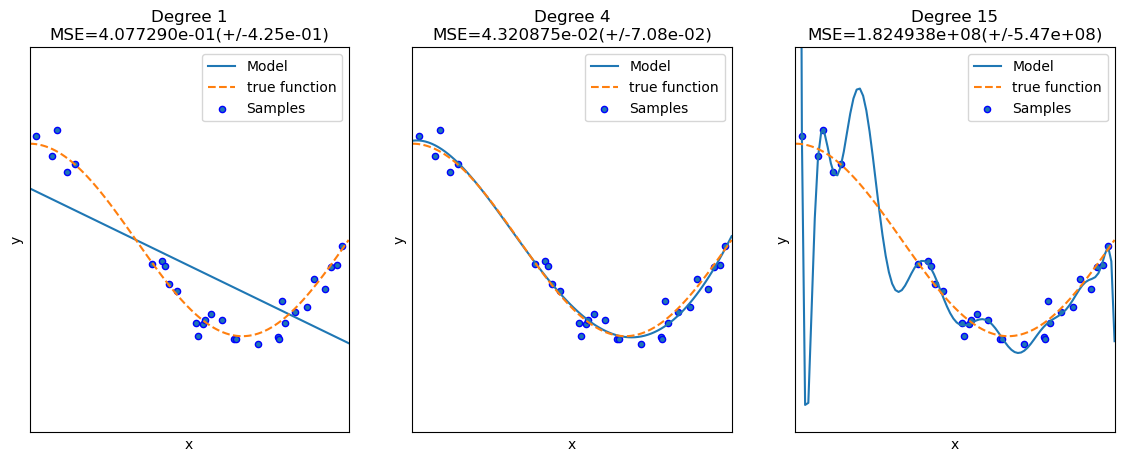

In [62]:
plt.figure(figsize=(14,5))
degrees=[1,4,15]

# 다항 회귀의 차수(degree)를 1,4,15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    ax=plt.subplot(1, len(degrees),i+1)
    plt.setp(ax,xticks=(),yticks=())
    
	# 개별degree별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression=LinearRegression()
    pipeline=Pipeline([("polynomial_features",polynomial_features),
                       ("linear_regression",linear_regression)])
    pipeline.fit(X.reshape(-1,1),y)

	# 교차 검증으로 다항 회기를 평가
    scores=cross_val_score(pipeline, X.reshape(-1,1), y, scoring="neg_mean_squared_error", cv=10)
    #pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients=pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i],np.round(coefficients,2)))
    print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i],-1*np.mean(scores)))
    
	# 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측 수행
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
    X_test=np.linspace(0,1,100)
    # 예측값 곡선
    plt.plot(X_test,pipeline.predict(X_test[:,np.newaxis]),label="Model")
    
	# 실제 값 곡선
    plt.plot(X_test,true_fun(X_test),'--',label="true function")
    plt.scatter(X,y, edgecolors='b',s=20, label="Samples")
    plt.xlabel("x"); plt.ylabel("y");plt.xlim((0,1));plt.ylim((-2,2));plt.legend(loc="best")
    plt.title("Degree {}\nMSE={:2e}(+/-{:.2e})".format(degrees[i],-scores.mean(),scores.std()))
    
plt.show()
    